In [1]:
using Pkg; Pkg.instantiate()

In [41]:
using NetCDF, Query, CSV, DataFrames, StatsBase, Plots, Colors, Plotly

┌ Warning: Module ColorSchemes with build ID 7022295875033042 is missing from the cache.
│ This may mean ColorSchemes [35d6a980-a343-548e-a6ea-1d62b119f2f4] does not support precompilation but is imported by a module that does.
└ @ Base loading.jl:1030
┌ Warning: Module ColorSchemes with build ID 7022295875033042 is missing from the cache.
│ This may mean ColorSchemes [35d6a980-a343-548e-a6ea-1d62b119f2f4] does not support precompilation but is imported by a module that does.
└ @ Base loading.jl:1030
┌ Warning: Module ColorSchemes with build ID 7022295875033042 is missing from the cache.
│ This may mean ColorSchemes [35d6a980-a343-548e-a6ea-1d62b119f2f4] does not support precompilation but is imported by a module that does.
└ @ Base loading.jl:1030
┌ Warning: Module ColorSchemes with build ID 7022295875033042 is missing from the cache.
│ This may mean ColorSchemes [35d6a980-a343-548e-a6ea-1d62b119f2f4] does not support precompilation but is imported by a module that does.
└ @ Base load

In [3]:
include("montecarlo/brickLSL.jl")

(::var"#y#34"{Int64, Int64}) (generic function with 1 method)

Set up

In [17]:
segIDs = false
brickfile = "data/lslr/lsl_rcp0_p50.csv"
n = 1
ystart = 2010; yend = 2150; tstep = 10

10

Non-climatic LSLR

In [15]:
lsl_nonclim = CSV.read(brickfile, DataFrame) |> DataFrame
years_nonclim = range(2010, stop=2200, length=20) |> collect

ciamlonlat = CSV.read("data/diva_segment_latlon.csv", DataFrame)
segnames = get_segnames(segIDs)
col_names = [i for i in names(lsl_nonclim) if string(i) in segnames]
col_names = sort(col_names)
lsl_nonclim = lsl_nonclim[!, col_names];

Use downscaling functionality within existing Julia/MimiCIAM code

Returns:
`return lsl,gmsl,brickEnsInds,temps,years`

Where `lsl` has elements `lsl[SOW, timesteps, segments]`

In [18]:
lsl = brick_lsl(0, segIDs, brickfile, n, lsl_nonclim, 
                years_nonclim, 50, 50, ystart, yend,
                tstep, false);

These are in the same order as `segnames`, `lsl_nonclim`, and `lsl[1]` coming out of `brick_lsl`

In [22]:
lonlat = get_lonlat(segIDs)

12148-element Vector{Tuple{Float64, Float64}}:
 (19.447, 41.859)
 (19.574, 41.816)
 (19.589, 41.73)
 (19.587, 41.633)
 (19.525, 41.572)
 (19.564, 41.584)
 (19.443, 41.406)
 (19.486, 41.167)
 (19.44, 41.03)
 (19.454, 41.011)
 ⋮
 (42.629, 15.454)
 (42.738, 14.054)
 (52.152, 12.243)
 (54.099, 12.347)
 (53.84, 12.611)
 (53.914, 12.33)
 (53.753, 12.309)
 (53.73, 12.313)
 (18.836, 42.286)

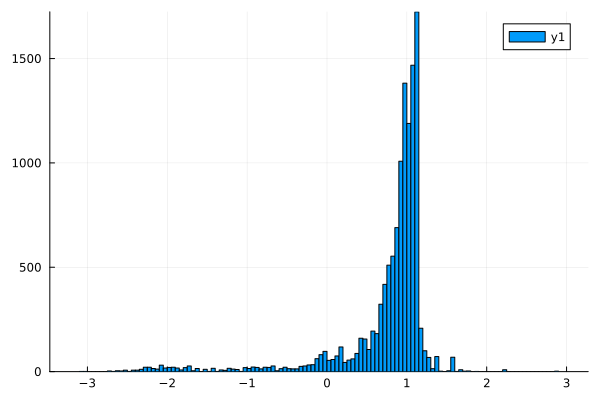

In [86]:
Plots.histogram(lsl[1][1,10,:])

TODO - here now, adding plots

In [34]:
lons = [x[1] for x in lonlat]
lats = [x[2] for x in lonlat];

In [242]:
cmin = -0.2
cmax = 1.4
ncols = 10
colind = (ncols * lsl[1][1,10,:]/cmax)# .+ 0.5
colind = [Int(round(ci)) for ci in colind]

@. colind = ifelse(colind<=0, 1, colind)
@. colind = ifelse(colind>ncols, ncols, colind)

# set up colorbar
c1 = HSL(colorant"green")
c2 = HSL(colorant"red")
cbar = range(c1, stop=c2, length=ncols)

# set up closer to IPCC colorbar
cb = colorant"rgb(146,197,222)"
cw = colorant"rgb(247,247,247)"
cr = colorant"rgb(150,0,31)"
cbar_bw = range(cb, stop=cw, length=3)
cbar_wr = range(cw, stop=cr, length=8)
cbar = range(cb, stop=cr, length=10)
cbar[1:3] = cbar_bw
cbar[4:10] = cbar_wr[2:8];

In [244]:
cbar

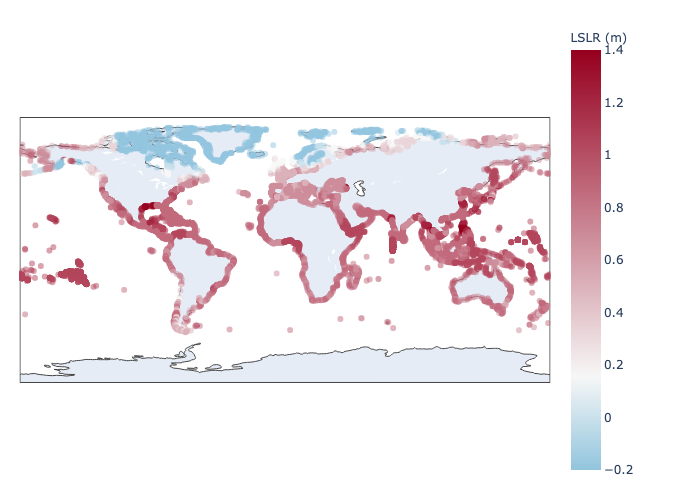

In [257]:
trace1 = scattergeo(lon=lons, lat=lats, mode="marker", 
                    marker=attr(size=6, symbol="circle", opacity=0.5, 
                                cmin=cmin, cmax=cmax, color=[cbar[ci] for ci in colind],
                                colorscale=[[(i-1.0)/(ncols-1),cbar[i]] for i in range(1,stop=ncols)],
                                colorbar=attr(title="LSLR (m)")))
Plotly.plot(trace1, Layout(geo_resolution=100, width=800, height=400,margin=attr(l=20, r=150, t=20, b=20)))

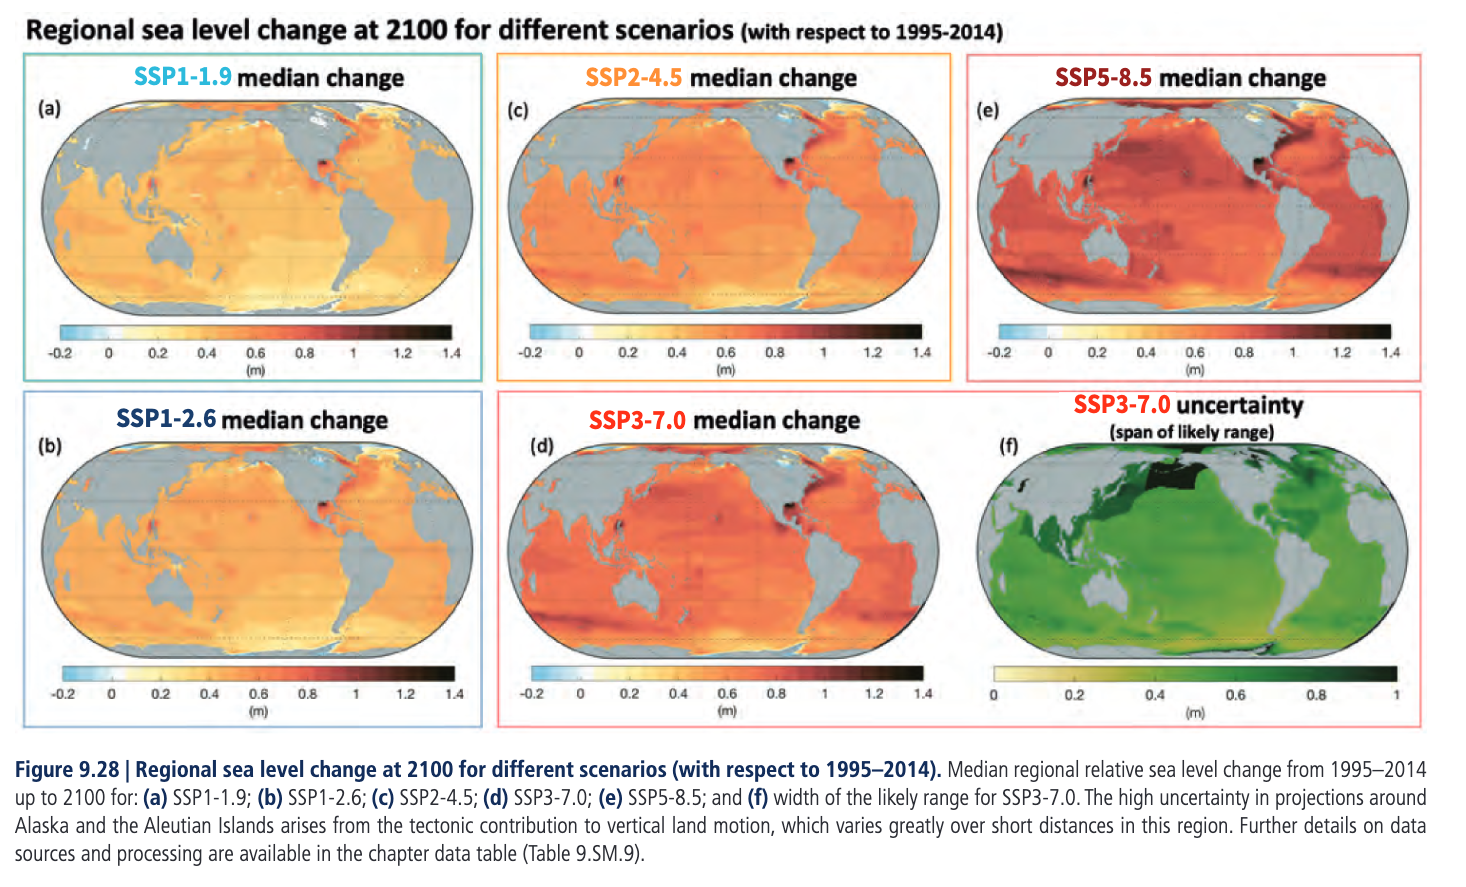